# Task11

Time of match: 28 : 57


(<matplotlib.axes._subplots.AxesSubplot at 0x1db9aebc6c8>,
 <matplotlib.image.AxesImage at 0x1db9aee0fc8>)

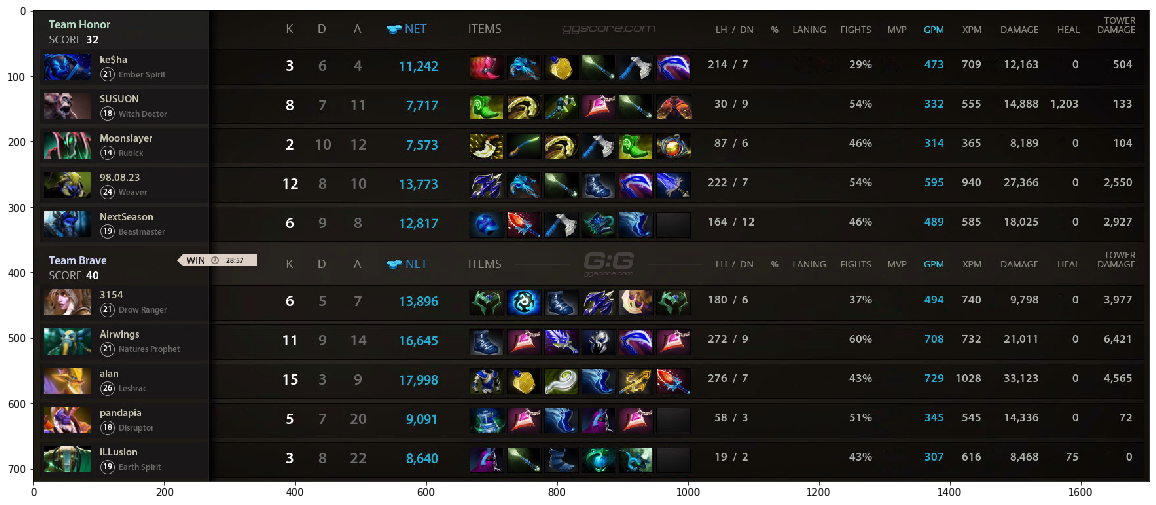

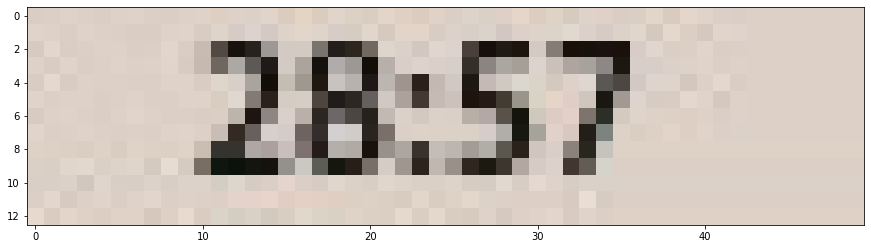

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

clk_template = cv2.imread("D:\MATCH_IMAGETemp.png")
# match3929
# match3857.
# match2643.png
numbersTemp = ['D:/0.png', 'D:/1.png', 'D:/2.png', 'D:/3.png', 'D:/4.png', 'D:/5.png', 'D:/6.png',
              'D:/7.png', 'D:/8.png', 'D:/9.png']
methods = ['cv2.TM_CCOEFF']
#            , 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR'
#         ,'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
def cropImg(img):
    k, w, h = clk_template.shape[::-1]
    for meth in methods:
        method = eval(meth)
        res = cv2.matchTemplate(img,clk_template,method)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
            top_left = min_loc
        else:
            top_left = max_loc
        bottom_right = (top_left[0] + w, top_left[1] + h)
#         cv2.rectangle(img,top_left, bottom_right, 255, 2)
        x = bottom_right[0]
        y = top_left[1]
        w = 50
        img = img[y:y+h, x:x+w]
#         img = img[x:x+h, y:y+w]
        return img
        
def Sort(sub_li): 
    return(sorted(sub_li, key = lambda x: x[1]))     
  
# print(Sort(sub_li)) 
def findNumbs(img):
    numbs = []
    for i in range(len(numbersTemp)):
        filename = numbersTemp[i]
        template = cv2.imread(filename)
        k, w, h = template.shape[::-1]
        res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
        threshold = 0.8
        loc = np.where( res >= threshold)
        for pt in zip(*loc[::-1]):
#             plt.figure(figsize=(15,5))
#             plt.subplot(111),plt.imshow(template,cmap = 'gray')
            numbs.append([i, pt[0]])
#             cv2.rectangle(img, pt, (pt[0] + w, pt[1] + h), (0,1+i*20,255), 1)
    return Sort(numbs)

        
# img = cv2.imread("D:\MATCH_IMAGE.png")
# img = cv2.imread("D:\MATCH_IMAGE1.png")
# img = cv2.imread("D:\MATCH_IMAGE2.png")
# img = cv2.imread("D:\match3929.png")
# img = cv2.imread("D:\match3857.png")
# img = cv2.imread("D:\match2643.png")
img = cv2.imread("D:\gt.png")
plt.figure(figsize=(20,20))
plt.subplot(111),plt.imshow(img,cmap = 'gray')
img = cropImg(img)
numbs = findNumbs(img)
print("Time of match:", numbs[0][0]*10 + numbs[1][0], ':', numbs[2][0]*10 + numbs[3][0])
plt.figure(figsize=(15,5))
plt.subplot(111),plt.imshow(img,cmap = 'gray')

# [top_left, bottom_right] = matchTemp(img, template)
# print(top_left, bottom_right)
# +50

# Task13

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

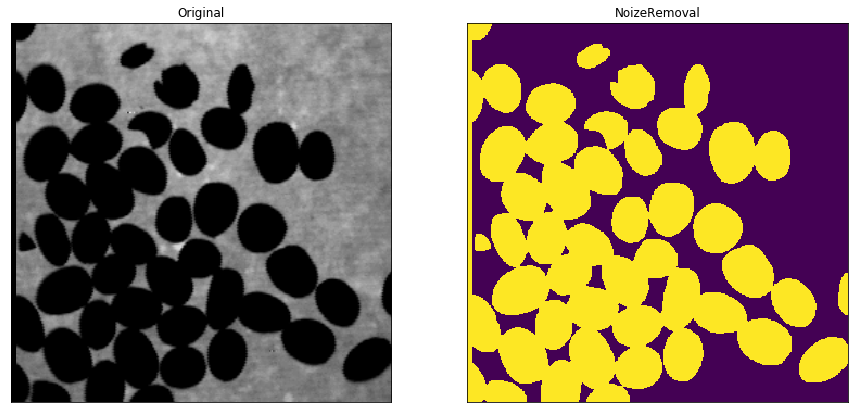

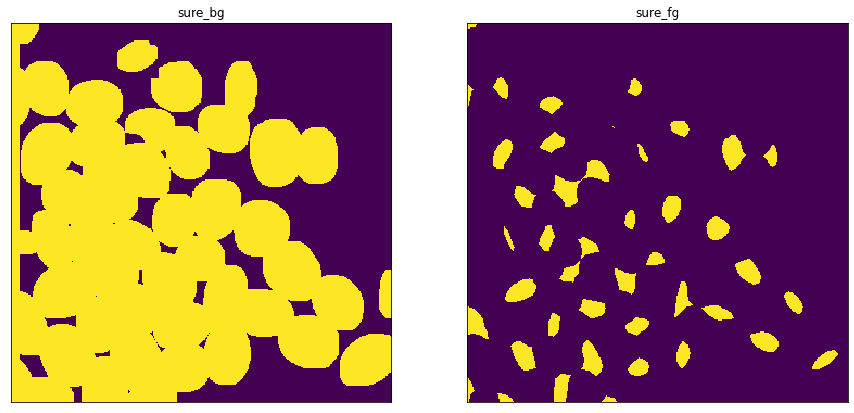

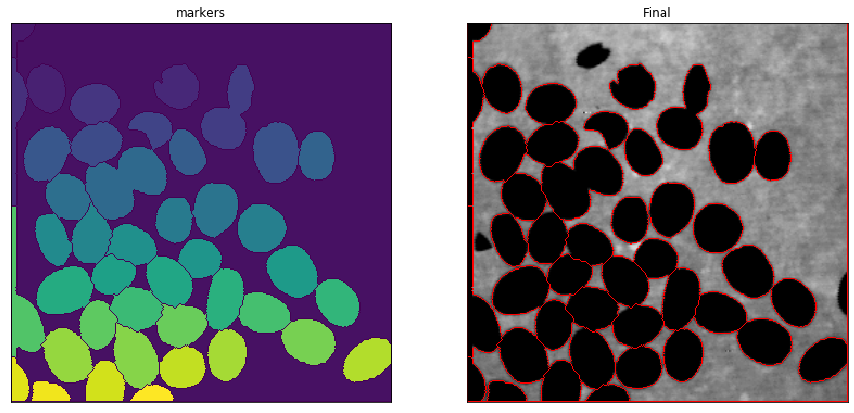

In [43]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# img = cv2.imread('D:\COINS.jpg')
# img = cv2.imread('D:\coins.png')
# img = cv2.imread('D:\cofee.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(opening),plt.title('NoizeRemoval')
plt.xticks([]), plt.yticks([])

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),10,0)

plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(sure_bg),plt.title('sure_bg')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(sure_fg),plt.title('sure_fg')
plt.xticks([]), plt.yticks([])

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]
plt.figure(figsize=(15,15))
plt.subplot(121),plt.imshow(markers),plt.title('markers')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img),plt.title('Final')
plt.xticks([]), plt.yticks([])

# Task14

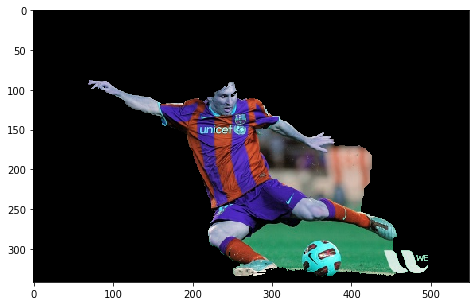

(<matplotlib.image.AxesImage at 0x1ecfc90f688>, None)

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img = cv.imread('D:\messi.jpg')
# img = cv.imread('D:\girl.jpg')
mask = np.zeros(img.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,450,290)
# rect = (925,23,445,850)
cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]
plt.figure(figsize=(10,5))
plt.imshow(img),plt.show()

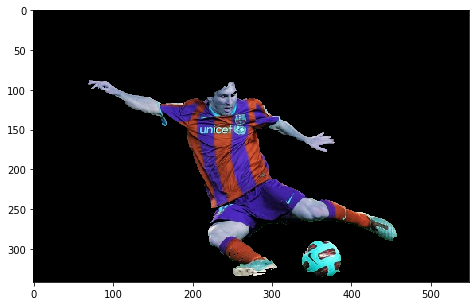

(<matplotlib.image.AxesImage at 0x1ecfc9b6c08>, None)

In [3]:
# newmask is the mask image I manually labelled
newmask = cv.imread('D:/messimask3.jpg',0)
# newmask = cv.imread('D:/girlmask.jpg',0)
# wherever it is marked white (sure foreground), change mask=1
# wherever it is marked black (sure background), change mask=0
mask[newmask == 0] = 0
mask[newmask == 255] = 1
mask, bgdModel, fgdModel = cv.grabCut(img,mask,None,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask[:,:,np.newaxis]
plt.figure(figsize=(10, 5))
# plt.imshow(newmask),plt.show()
plt.imshow(img),plt.show()

# Task15

In [5]:
def changeBritness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img
def changeContrast(image, alpha = 1.5):
    beta = 0 # Brightness control (0-100)
    adjusted = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return adjusted

(<matplotlib.axes._subplots.AxesSubplot at 0x1db99e72fc8>,
 <matplotlib.image.AxesImage at 0x1db997fdbc8>)

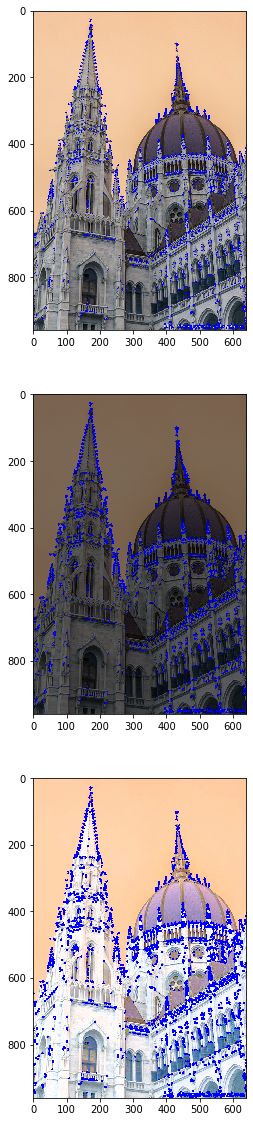

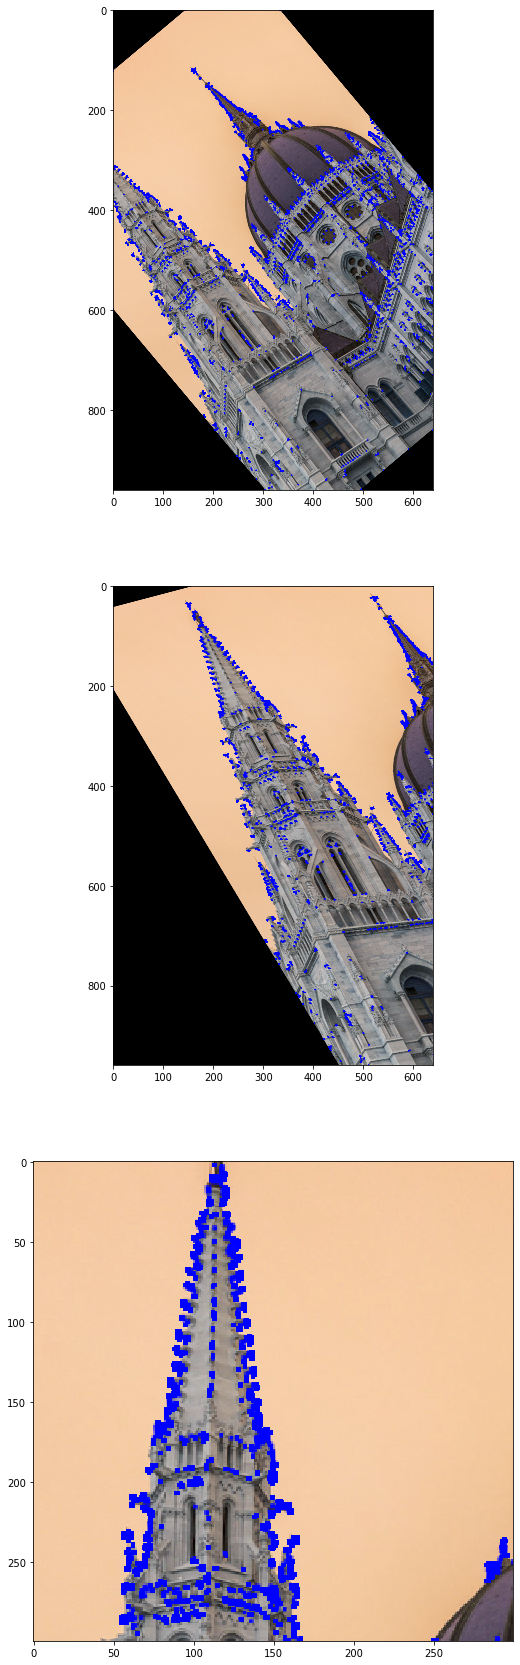

In [8]:
import cv2
import numpy as np
def aff(img):
    rows,cols,ch = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),40,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst
def aff2(img):
    rows,cols,ch = img.shape
    pts1 = np.float32([[50,50],[200,50],[50,200]])
    pts2 = np.float32([[10,100],[200,50],[100,250]])
    M = cv2.getAffineTransform(pts1,pts2)
    dst = cv2.warpAffine(img,M,(cols,rows))
    return dst
def persp(img):
    rows,cols,ch = img.shape
    pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
    pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
    M = cv2.getPerspectiveTransform(pts1,pts2)
    dst = cv2.warpPerspective(img,M,(300,300))
    return dst
def Harris(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)

    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)

    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.05*dst.max()]=[0,0,255]
    return img
    

# filename = 'D:/spb.jpg'
filename = 'D:/3.jpg'
img = cv2.imread(filename)

img1 = Harris(img)
img2 = Harris(changeContrast(img, 0.5))
img3 = Harris(changeBritness(img, 110))
# cv2.imshow('dst',img)
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()
plt.figure(figsize=(15,20))
plt.subplot(311),plt.imshow(img1)
plt.subplot(312),plt.imshow(img2)
plt.subplot(313),plt.imshow(img3)

img1 = Harris(aff(img))
img2 = Harris(aff2(img))
img3 = Harris(persp(img))
plt.figure(figsize=(15,30))
plt.subplot(311),plt.imshow(img1)
plt.subplot(312),plt.imshow(img2)
plt.subplot(313),plt.imshow(img3)

(<matplotlib.axes._subplots.AxesSubplot at 0x215df025ec8>,
 <matplotlib.image.AxesImage at 0x215df083b08>)

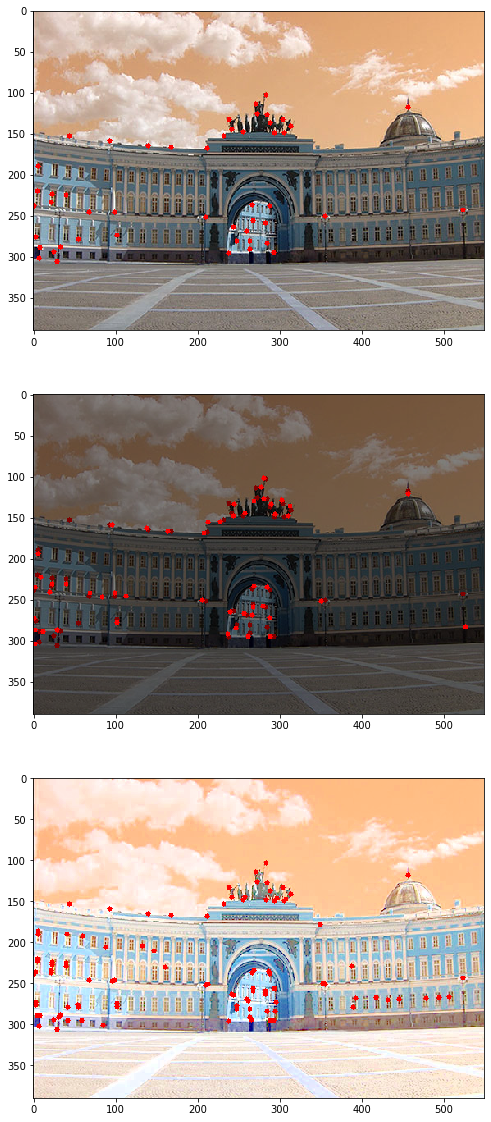

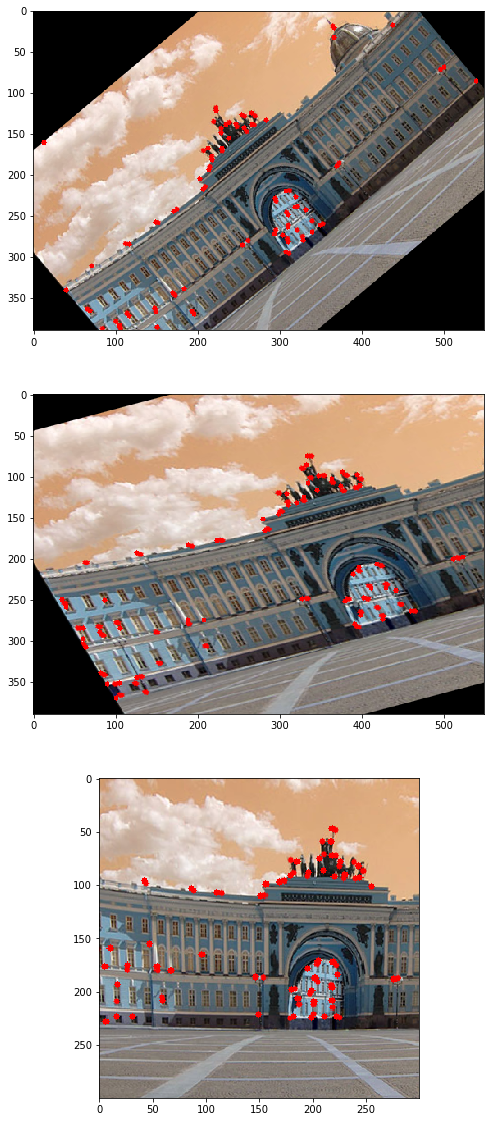

In [86]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def Shi_Tomachi(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    corners = cv2.goodFeaturesToTrack(gray,50,0.01,10)
    corners = np.int0(corners)

    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y),3,255,-1)
    return img

img = cv2.imread('D:/spb.jpg')
# img = cv2.imread('D:/3.jpg')

img1 = Shi_Tomachi(img)
img2 = Shi_Tomachi(changeContrast(img, 0.5))
img3 = Shi_Tomachi(changeBritness(img, 110))
# cv2.imshow('dst',img)
# if cv2.waitKey(0) & 0xff == 27:
#     cv2.destroyAllWindows()
plt.figure(figsize=(15,20))
plt.subplot(311),plt.imshow(img1)
plt.subplot(312),plt.imshow(img2)
plt.subplot(313),plt.imshow(img3)

img1 = Shi_Tomachi(aff(img))
img2 = Shi_Tomachi(aff2(img))
img3 = Shi_Tomachi(persp(img))
plt.figure(figsize=(15,20))
plt.subplot(311),plt.imshow(img1)
plt.subplot(312),plt.imshow(img2)
plt.subplot(313),plt.imshow(img3)

# Task16

(<matplotlib.axes._subplots.AxesSubplot at 0x2133c803e08>,
 <matplotlib.image.AxesImage at 0x2133c821488>)

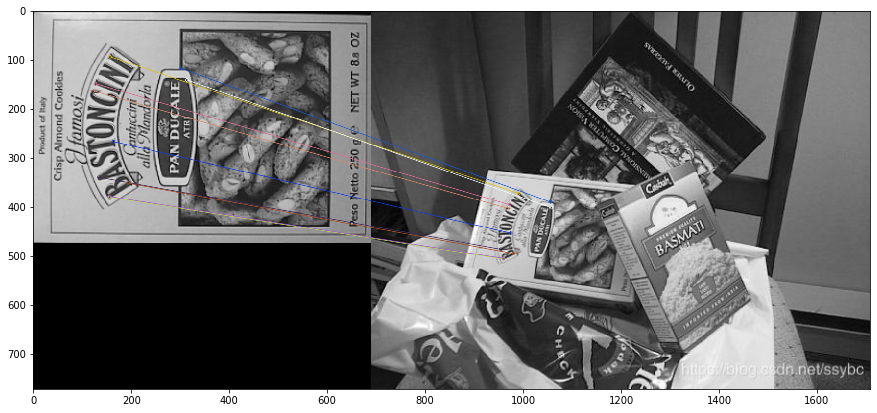

In [27]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# img1 = cv.imread('box.png',cv.IMREAD_GRAYSCALE)          # queryImage
# img2 = cv.imread('box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage
# Initiate ORB detector
orb = cv.ORB_create()
img1 = cv.imread('D:/baston.png',cv.IMREAD_GRAYSCALE)
img2 = cv.imread('D:/box_in_scene.png',cv.IMREAD_GRAYSCALE)
# img1 = cv.imread('D:\kol1.png',0) 
# img2 = cv.imread('D:\kol2.png',0) # trainImage
# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)
# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)
# Draw first 10 matches.
img3 = cv.drawMatches(img1,kp1,img2,kp2,matches[:10],None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
# plt.imshow(img3),plt.show()
plt.figure(figsize=(15,15))
plt.subplot(111),plt.imshow(img3)

(<matplotlib.axes._subplots.AxesSubplot at 0x215c3c5bf08>,
 <matplotlib.image.AxesImage at 0x215bf047448>)

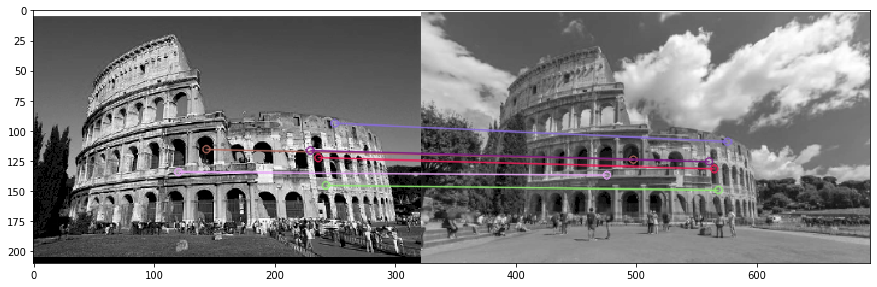

In [5]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
# img1 = cv.imread('D:/baston.png',cv.IMREAD_GRAYSCALE)
# img2 = cv.imread('D:/box_in_scene.png',cv.IMREAD_GRAYSCALE) # trainImage

img1 = cv.imread('D:\kol1.png',0) 
img2 = cv.imread('D:\kol2.png',0) # trainImage
# Initiate SIFT detector
sift = cv.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append([m])
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15,15))
plt.subplot(111),plt.imshow(img3)